$\DeclareMathOperator*{\argmin}{arg\,min}$
$\DeclareMathOperator*{\argmax}{arg\,max}$
$\newcommand{\norm}[1]{\lvert \lvert #1 \rvert \rvert}$

# <center>Principal Component Analysis</center>
### <center>Calvin Chi</center>

# I. Introduction
Principle component analysis (PCA) is a dimensionality reduction technique. Given samples $x^{(1)}, \dots ,x^{(m)} \in \mathbb{R}^{n}$, PCA can find $\tilde{x}^{(1)}, \cdots ,\tilde{x}^{(m)} \in \mathbb{R}^{k}$ with $k < n$ such that $\tilde{x}^{(1)}, \cdots ,\tilde{x}^{(m)} \in \mathbb{R}^{k}$ remains much of the information in the original data. PCA does so by projecting $x^{(1)}, \dots ,x^{(m)}$ onto $k$ orthogonal vectors such that the variance of the projected samples is maximized. Alternatively and equivalently, PCA can be understood as finding $k$ successive least squares projection vectors for samples $x^{(1)}, \dots ,x^{(m)}$ onto a line. 

# II. Maximum Variance Projection
Let us start with the problem of solving for a vector $u: || u ||_{2} = 1$ for $x^{(1)}, \dots ,x^{(m)}$ to project to such that that the projections have maximum variance. The projection component of $x$ onto $u$ is given by the projection equation

$$proj_{u}x = \frac{x^{T}u}{||u||_{2}} = u^{T}x$$

The mean of the projections is $u^{T}\hat{x}$, where $\hat{x} = \frac{1}{m}\sum_{i}x^{(i)}$. From definition of variance

$$
\begin{align*}
\sigma^{2} &= \frac{1}{m}\sum_{i = 1}^{m}\left[u^{T}(x_{i} - \hat{x})\right]^{2}\\
&= \frac{1}{m}\sum_{i = 1}^{m}u^{T}(x_{i} - \hat{x})(x_{i} - \hat{x})^{T}u\\
&= u^{T}\left[\frac{1}{m}\sum_{i = 1}^{m}(x_{i} - \hat{x})(x_{i} - \hat{x})^{T}\right]u\\
&= \frac{1}{m}u^{T}Cu
\end{align*}
$$

where $C \in \mathbb{R}^{n \times n}$ is the covariance matrix of features. Now we enter the task of solving for $u$ such that the variance $\sigma^{2}$ is maximized. Since $C = C^{T}$, we can apply eigendecomposition in solving for $u$.

$$
\begin{align*}
\max_{u: ||u||_{2} = 1}u^{T}Cu &= \max_{u: ||u||_{2} = 1}u^{T}UDU^{T}u\\
&= \max_{w: ||w||_{2} = 1}w^{T}Dw\\
&= \max_{w: ||w||_{2} = 1}\lambda_{i}w_{i}^{2}\\
\end{align*}
$$

where $\lambda_{i}$ is the $ii$th entry of diagonal matrix $D \in \mathbb{R}^{n \times n}$. The solution is $w^{*} = e_{1}$, which is a vector of zeros except with a 1 in the first entry. This implies that $u^{*} = Uw^{*} = u_{1}$, the first eigenvector of $C$. The maximum objective value for $\sigma^{2}$ is then $\lambda_{1}$, the largest eigenvalue of $C$. More generally, $u_{i}$ is the vector to project $x^{(1)}, \dots ,x^{(m)}$ onto that yields the $i$th largest variance of projected points.

# III. Least Squares  Projection
Now we discuss a different, but equivalent perspective of PCA. Given $x^{(1)}, \dots ,x^{(m)} \in \mathbb{R}^{n}$, PCA seeks to find a line such that the sum of squared distances from the points to the line is minimized. 

$$
\begin{align*}
\mathcal{L}(x_{0}, u) = \{x_{0} + tu \: : \: t \in \mathbb{R}\}
\end{align*}
$$

where $x_{0}$ and $u \in \mathbb{R}^{n}$ with $||u||_{2} = 1$ is to be solved. Given any $u : ||u||_{2} = 1$, $x_{0}$, $t$ can be solved that minimizes the distance. 

$$
\begin{align*}
\argmin_{t}\norm{x_{0} + ut - x}_{2} &= \argmin_{t}\norm{x_{0} + ut - x}_{2}^{2}\\
&= \argmin_{t}[(x_{0} - x) + ut]^{T}[(x_{0} - x) + ut]\\
&= \argmin_{t}(x_{0} - x)^{T}(x_{0} - x) + 2t(x_{0} - x)^{T}u + t^{2}u^{T}u\\
&\Rightarrow 2(x_{0} - x)^{T}u + 2t = 0\\
&\Rightarrow t^{*} = u^{T}(x - x_{0})
\end{align*}
$$

Substituting $t^{*}$, and noting that $\norm{x_{0} + ut - x}_{2} = \norm{x - ut - x_{0}}_{2}$, we get

$$
\begin{align*}
D(x, \mathcal{L}(x_{0}, u)) &= \norm{(x - x_{0})^{T}(I_{n} - uu^{T})}_{2}\\
&= \norm{(x - x_{0})^{T}P(u)}_{2}\\
&\Rightarrow D(x, \mathcal{L}(x_{0}, u))^{2} = [P(u)(x - x_{0})]^{T}[P(u)(x - x_{0})]\\
&= (x - x_{0})^{T}P(u)P(u)(x - x_{0})\\
&= (x - x_{0})^{T}P(u)(x - x_{0})
\end{align*}
$$

where the last equality comes from $P(u)$ being idempotent. The problem of minimizing the sum of squared differences is now

$$
\begin{align*}
&\min_{u:\norm{u}_{2} = 1, x_{0}}\sum_{i = 1}^{m}D(x^{(i)}, \mathcal{L}(x_{0}, u))^{2}\\
&= \min_{u:\norm{u}_{2} = 1, x_{0}}\sum_{i = 1}^{m}(x^{(i)} - x_{0})^{T}P(u)(x^{(i)} - x_{0})\\
&\Rightarrow \sum_{i = 1}^{m}-2P(u)(x^{(i)} - x_{0}) = 0\\
&\Rightarrow mP(u)(\hat{x} - x_{0}) = 0\\
\end{align*}
$$

where $\hat{x} = \frac{1}{m}\sum_{i}x^{(i)}$. From the last expression to equal 0, $x_{0} = \hat{x}$. Substituting optimal $x_{0}^{*}$, our least squares problem now becomes

$$
\begin{align*}
&\min_{u:\norm{u}_{2} = 1}\sum_{i = 1}^{m}(x^{(i)} - \hat{x})^{T}P(u)(x^{(i)} - \hat{x})\\
&= \min_{u:\norm{u}_{2} = 1}\sum_{i = 1}^{m}(x^{(i)} - \hat{x})^{T}(x^{(i)} - \hat{x}) - (x^{(i)} - \hat{x})^{T}uu^{T}(x^{(i)} - \hat{x})\\
&= \min_{u:\norm{u}_{2} = 1}\sum_{i = 1}^{m}-u(x^{(i)} - \hat{x})(x^{(i)} - \hat{x})^{T}u\\
&= \max_{u:\norm{u}_{2} = 1}u\left(\sum_{i = 1}^{m}(x^{(i)} - \hat{x})(x^{(i)} - \hat{x})^{T}\right)u^{T}\\
&\Rightarrow \argmax_{u:\norm{u}_{2} = 1}u^{T}Cu
\end{align*}
$$

which becomes the same problem as variance maximization. From section II, we know that the solution is $U \in \mathbb{R}^{n \times n}$, the eigenvectors of the covariance matrix of $X \in \mathbb{R}^{m \times n}$. It is worth interpreting the matrix $P(U) = I_{n} - \tilde{U}\tilde{U}^{\top}$, where $\tilde{U} \in \mathbb{R}^{n \times k}$. When $k = 1$, $u_{1}^{\top}x$ is the projection and $u_{1}u_{1}^{\top}x$ is the corresonding projected vector. More generally, $P = \tilde{U}\tilde{U}^{\top}$ is a projection matrix because $P^{\top} = P$ and $P^{2} = P$. Note that while $\tilde{U}^{\top}\tilde{U} = I_{k}$, $\tilde{U}\tilde{U}^{\top} \neq I_{k}$, because only $UU^{\top} = \sum_{i = 1}^{n}u_{i}u_{i}^{\top} = I_{n}$. An interpretation from PCA is that each of the original samples is a linear combination of the principal axes.

$$
\begin{align*}
X = XUU^{\top} = XU
\begin{bmatrix}
u_{1}^{\top}\\
\vdots\\
u_{n}^{\top}\\
\end{bmatrix}
\end{align*}
$$

Through PCA, an reconstruction $\tilde{X}$ of the original dataset $X$ is achieved using only $k < n$ number of principal axes.

$$
\begin{align*}
\tilde{X} = X\tilde{U}\tilde{U}^{\top} 
\end{align*}
$$

Thus, $P(U)x$ is the subtraction between the original $x \in \mathbb{R}^{n}$ and the reconstructed $\tilde{x} \in \mathbb{R}^{n}$. By geometry of projection, $u \perp (x - uu^{\top}x)$, and this can be verified by

$$u^{\top}(x - uu^{\top}x) = 0$$

The quantity $P(u)x$ is sometimes referred to as the reconstruction error. It is also worth noting that the principal components of a sample centered design matrix are orthogonal, and this by extension implies that the principal components have covariance and correlation of zero. Assume that $X \in \mathbb{R}^{m \times n}$ is mean centered such that $\frac{1}{m}X^{\top}X = C$, and that the covariance matrix has eigendecomposition $C = UDU^{\top}$. Then for any $i \neq j$ 

$$
\begin{align*}
(Xu_{i})^{\top}(Xu_{j}) &= u_{i}^{\top}X^{\top}Xu_{j}\\
&= mu_{i}^{\top}\left(\frac{1}{m}X^{\top}X\right)u_{j}\\
&= mu_{i}^{\top}UDU^{\top}u_{j}\\
&= me_{i}^{\top}De_{j}\\
&= 0
\end{align*}
$$

Let $z_{i} = Xu_{i}$ and $z_{j} = Xu_{j}$ be two different principal components. Then the covariance is zero because

$$
\begin{align*}
\frac{1}{m}\left(z_{i} - \frac{1}{m}1_{m}1_{n}^{\top}z_{i}\right)^{\top}\left(z_{j} - \frac{1}{m}1_{m}1_{m}^{\top}z_{j}\right) = \frac{1}{m}z_{i}^{\top}z_{j} = 0
\end{align*}
$$

where $\frac{1}{m}1_{m}1_{m}^{\top}z_{i} = 0$ and $\frac{1}{m}1_{m}1_{m}^{\top}z_{j} = 0$ because $X$ is mean centered, so $1_{m}^{\top}X = 0$. If the covariance is zero, then the correlation is zero as well.

# IV. Low Rank Approximation
PCA is related to the low rank approximation problem of the form

$$
\begin{align*}
\min_{L, R}\norm{X - LR^{T}}_{F}
\end{align*}
$$

where $X \in \mathbb{R}^{n \times m}$ and $L \in \mathbb{R}^{n \times k}$ and $R \in \mathbb{R}^{m \times k}$. The solution involves the SVD

$$
\begin{align*}
L =
\begin{bmatrix}
u_{1} \cdots u_{k}
\end{bmatrix}
\begin{bmatrix}
\sigma_{1} & &\\
 & \ddots &\\
 & & \sigma_{k}\\
\end{bmatrix}
\quad
R = 
\begin{bmatrix}
v_{1}^{T}\\
\vdots\\
v_{k}^{T}\\
\end{bmatrix}
\end{align*}
$$

The proof that SVD yields the best low rank approximation is outside the scope of this note and can be found elsewhere. If we have the reduced dimension representation of samples and features from PCA, where $samples = \tilde{U}\tilde{S} \in \mathbb{R}^{m \times k}$ and $features = \tilde{V}\tilde{S} \in \mathbb{R}^{n \times k}$, then reconstruction of the original matrix $X \in \mathbb{R}^{m \times n}$ can be done via

$$
\begin{align*}
X \approx samples \: \tilde{S}^{-1} features^{T} = \tilde{U}\tilde{S}\tilde{V}^{T}
\end{align*}
$$

# V. Implementation
We discuss two common ways to perform PCA to the dataset $X \in \mathbb{R}^{m \times n}$, where $m$ is the number of samples and $n$ is the number of features. For convenience, assume each sample has been mean centered (i.e. the mean $\hat{x} \in \mathbb{R}^{n}$ was substracted from each sample $x^{(i)}$), so that the covariance matrix $C$ can be constructed as
$$
\begin{align*}
C = \frac{1}{m}X^{T}X = \frac{1}{m}VS^{2}V^{T}
\end{align*}
$$

We now discuss how to use singular value composition (SVD) of $X$ to perform PCA. From sections II & III, we saw that the first projection vector is $v_{1} \in \mathbb{R}^{n \times n}$, which we now call the first principal axis. The $m$ projected samples $Xv_{1}$ onto $v_{1}$ are called the first principal component. 

The projection onto all $n$ principal axes can be written in different ways via the SVD.

$$
\begin{align*}
XV = USV^{T}V = US
\end{align*}
$$

Hence, with the SVD of centered $X$, we can perform PCA to get $\tilde{X} \in \mathbb{R}^{m \times k}$, where $k < n$, using one of the two equivalent ways.

1. $\tilde{X} = X\tilde{V}$, where $V \in \mathbb{R}^{n \times k}$
2. $\tilde{X} = \tilde{U}\tilde{S}$, where $\tilde{U} \in \mathbb{R}^{m \times k}$ and $\tilde{S} \in \mathbb{R}^{k \times k}$

Note that the square of the singular values of $S$ from SVD of $X$ is equal to the variances of the projections onto the right-singular vectors $v_{i}$'s. In the same fashion, PCA of feature vectors rather than sample vectors is performed via $\tilde{X^{T}} = X^{T}\tilde{U} = \tilde{V}\tilde{S}$.

# VI. Comparison to sklearn
Let us compare our own implementation with Sklearn's PCA implementation. Our data will be three-dimensional with 20 samples drawn from $\mathcal{N}(0, I_{3})$ and 20 samples drawn from $\mathcal{N}(1_{3}, I_{3})$. 

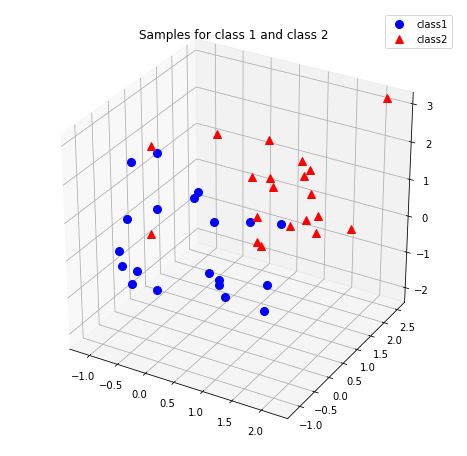

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import pandas as pd

np.random.seed(1)

#Class 1
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T

#Class 2
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d') #1x1 grid, 1st subplot. 3D plot
plt.rcParams['legend.fontsize'] = 10
#alpha = measure of transparency
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:],
        'o', markersize=8, color='blue', alpha=1, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:],
        '^', markersize=8, alpha=1, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

Before performing PCA, we need to center the samples before performing SVD to find the eigenvectors and eigenvalues.

In [30]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1).T
df = pd.DataFrame({1:all_samples[:,0], 2:all_samples[:,1], 3:all_samples[:,2]})
df_means = df.mean(axis=0)

#Centering the data: 
df_centered = df - df_means

#Getting eigenvectors and eigenvalues
U, S, V = np.linalg.svd(df_centered / 40, full_matrices=0)
S = np.diag(S)

Reduce the dimensions of samples from 3 to 2.

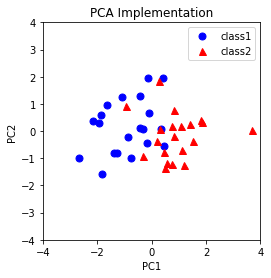

In [35]:
samples_reduced = df_centered.dot(-V[0:2, :].T)
plt.plot(samples_reduced.iloc[:20,0], samples_reduced.iloc[:20, 1],
         'o', markersize=7, color='blue', alpha=1, label='class1')
plt.plot(samples_reduced.iloc[20:40, 0], samples_reduced.iloc[20:40, 1],
         '^', markersize=7, color='red', alpha=1, label='class2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.title('PCA Implementation')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Results from sklearn.

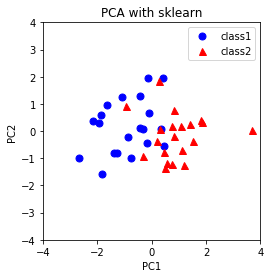

In [34]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)  #Number of eigenvectors to project to
sklearn_transf = sklearn_pca.fit_transform(df_centered)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1],
         'o', markersize=7, color='blue', alpha=1, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1],
         '^', markersize=7, color='red', alpha=1, label='class2')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('PCA with sklearn')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Thus, the PCA implementation yields the same PCA plot as that from sklearn. Notice that in the implementation, the samples are projected to $-v_{i}$ instead of $v_{i}$ so that the PCA plots are in the same orientation. Both vectors $v_{i}$ and $-v_{i}$ are valid vectors to project onto in PCA since SVD and eigendecomposition are not unique (i.e. ($-U)D(-U^{\top}) = UDU^{\top}$)).

# VII. Application: eigenfaces
One of the famous applications of PCA was reported by Turk and Pentland in the paper "Eigenfaces for Recognition". In this report, face images are projected onto "eigenfaces" that spans the significant variations among known face images. These "eigenfaces" are in fact the vectors from PCA to project samples onto. We will recreate some of the work in "Eigenfaces for Recognition", with the help of python code from [here](https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184). In this demonstration, we will work with both the celebrity and student face image datasets, to

1. Visualize the top "eigenfaces" from the celebrity dataset
2. Reconstruct celebrity face images from most important "eigenfaces"
3. Reconstruct student face images from most important "eigenfaces"

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import os

%matplotlib inline

"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(i + 1)
        plt.xticks(())
        plt.yticks(())
        
def pca(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    U, S, V = np.linalg.svd(centered_data)
    axes = V[:n_pc]
    components = U[:,:n_pc]*S[:n_pc]
    return components, axes, mean, centered_data

def mask_image(img):
    img[idx] = 0
    return img

Visualize randomly sampled face images from the celebrity database.

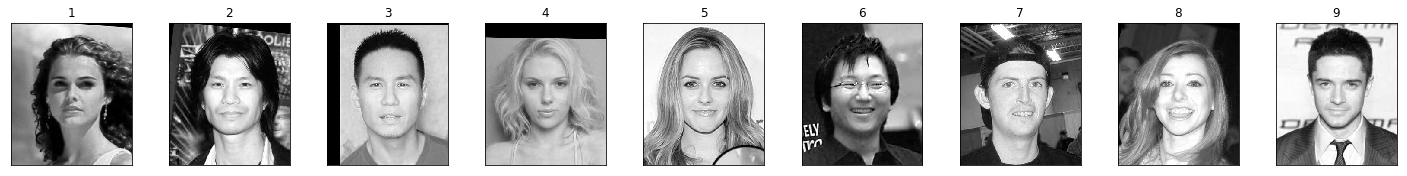

In [94]:
DIR = './datasets/CelebrityDatabase'
celebrity_photos = os.listdir(DIR)
celebrity_images = [DIR + '/' + photo for photo in celebrity_photos]
images = np.array([plt.imread(image) for image in celebrity_images], dtype=np.float64)
images = images[:, :, :, 0]
n_samples, h, w = images[:, :, :].shape
plot_portraits(images, h, w, n_row=1, n_col=9)

Next, we load a priori supplied image positions where we set the pixel values to zero so that the PCA of the image dataset will be based upon variation among the faces themselves. We also subset the images to select the faces and to reduce the size of the dataset.

In [95]:
mask = scipy.io.loadmat('./datasets/mask.mat')['mask']
images = np.array([mask_image(image)[110:230, 80:200] for image in images])
n_samples, h, w = images[:, :, :].shape
images = images.reshape(n_samples, h * w)

Perform PCA and retrieve the top 50 principal components and principal axes.

1. Vectorize the pixels so that each image is now represented by a vector.
2. Center each sample, and let $X \in \mathbb{R}^{m \times n}$ be the resulting dataset.
3. Perform SVD $X = USV^{\top}$, where the columns of $V$ are the eigenvectors (eigenfaces) to project to. 

In [96]:
n_components = 50
components, axes, M, centered = pca(images, n_pc = n_components)

Visualize the top 9 eigenfaces.

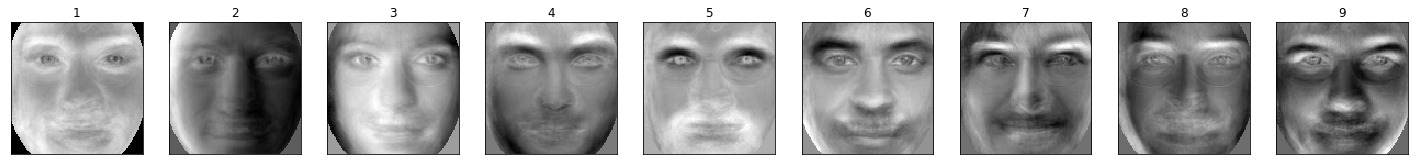

In [97]:
eigenfaces = axes.reshape((n_components, h, w))
plot_portraits(eigenfaces, h, w, 1, 9) 

It appears that the top eigenfaces capture different aspects of a face image. For example, eigenface 1 might correspond to the general features of a face, eigenface 2 might correspond to a particular lighting on the face, eigenface 5 corresponds to a bearded face...etc.

To reconstruct celebrity faces from the top 50 eigenfaces, recall that the original design matrix can be approximated with a weighted linear combination of the top principal axes, which are eigenfaces in this case.

1. Let $X\tilde{V} \in \mathbb{R}^{m \times k}$ be those weights, where $k < n$. 
2. Then $X\tilde{V}\tilde{V}^{\top}$ is the weighted linear combination of $v_{1}, \dots v_{k}$ that reconstructs the centered design matrix 
3. Adding the mean image back $X\tilde{V}\tilde{V}^{\top} + 1_{m}\hat{x}^{\top}$ reconstructs the original design matrix. 


In [98]:
def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M + centered_vector).reshape(h, w)
    return recovered_image

Display 9 original celebrity images.

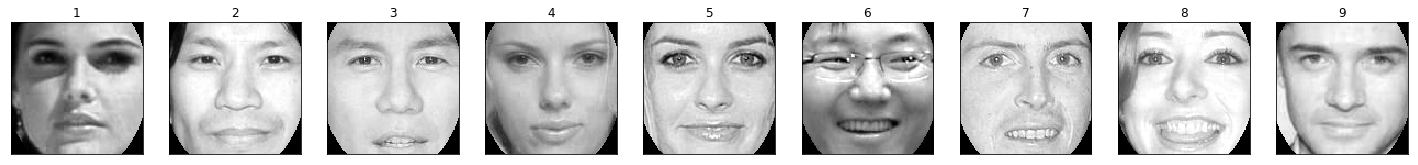

In [99]:
plot_portraits(images, h, w, 1, 9) 

and the 9 corresponding reconstructed celebrity images.

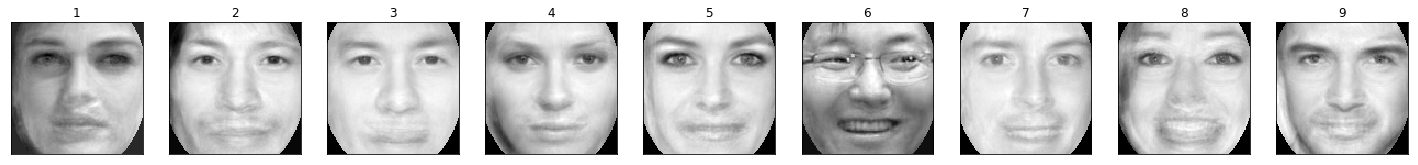

In [100]:
recovered_images=[reconstruction(centered, axes, M, h, w, i) for i in range(len(images))]
plot_portraits(recovered_images, h, w, n_row=1, n_col=9)

Lastly, we load student face images from another dataset, and attempt to reconstruct student face images $Y \in \mathbb{R}^{m^{\prime} \times n}$ as follows

1. Mask and subset face images as before so that the dimensions of the celebrity and student images match.
2. Vectorize student face images, center them, and project them onto celebrity eigenfaces $Y\tilde{V}$
3. Reconstruct student face images from celebrity eigenfaces as $Y\tilde{V}\tilde{V}^{\top} + 1_{m}\hat{y}^{\top}$.

Display 9 original student images.

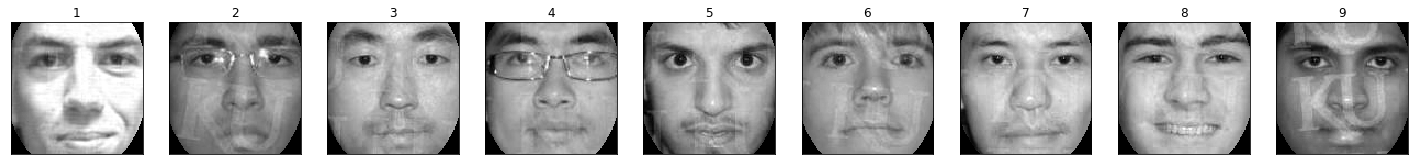

In [102]:
DIR = './datasets/StudentDatabase'
student_photos = os.listdir(DIR)
student_images = [DIR + '/' + photo for photo in student_photos]
student_images = np.array([plt.imread(image) for image in student_images], dtype=np.float64)
student_images = student_images[:, :, :, 0]
student_images = np.array([mask_image(image)[110:230, 80:200] for image in student_images])
n_samples, h, w = student_images[:, :, :].shape
student_images = student_images.reshape(n_samples, h * w)
plot_portraits(student_images, h, w, n_row=1, n_col=9)

and the 9 corresponding reconstructed student images.

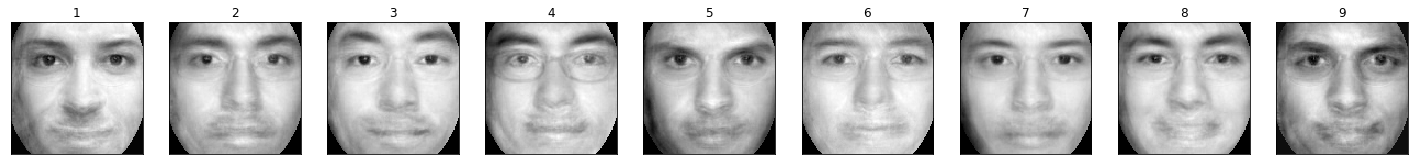

In [106]:
mean_student = np.mean(student_images, axis=0)
student_centered_data = student_images - mean_student
recovered_student_images=[reconstruction(student_centered_data, axes, mean_student, h, w, i) for i in range(len(student_images))]
plot_portraits(recovered_student_images, h, w, n_row=1, n_col=9)

If the orignal and reconstructed student images appear similar, then this supports the belief that many human faces can be reconstructed using a weighted linear combination of eigenfaces. 